In [ ]:
# version with GPU

**NOTE: This notebook is written for the Google Colab platform, which provides free hardware acceleration. However it can also be run (possibly with minor modifications) as a standard Jupyter notebook, using a local GPU.**

**POZNÁMKA: Tento notebook je určený pre platformu Google Colab, ktorá zdarma poskytuje hardvérovú akceleráciu. Je však možné ho spustiť (možno s drobnými úpravami) aj ako štandardný Jupyter notebook, pomocou lokálnej grafickej karty.**

In [ ]:
# version without GPU

**NOTE: This notebook is written for the Google Colab platform. However it can also be run (possibly with minor modifications) as a standard Jupyter notebook.**

**POZNÁMKA: Tento notebook je určený pre platformu Google Colab. Je však možné ho spustiť (možno s drobnými úpravami) aj ako štandardný Jupyter notebook.**

In [ ]:
#@title -- Installation of Packages -- { display-mode: "form" }
import sys
!{sys.executable} -m pip install lapjv
!{sys.executable} -m pip install git+https://github.com/michalgregor/class_utils.git

# when using apt install, always call apt update first!!!
!apt update
!apt install xvfb

In [1]:
#@title -- Import of Necessary Packages -- { display-mode: "form" }
import numpy as np
from class_utils import error_histogram

In [1]:
#@title -- Downloading Data -- { display-mode: "form" }
DATA_HOME = "https://github.com/michalgregor/luiza_notebooks/blob/master/data/{}?raw=1"
# DATA_HOME = "https://github.com/michalgregor/ml_notebooks/blob/main/data/{}?raw=1"

from class_utils.download import download_file_maybe_extract
download_file_maybe_extract(DATA_HOME.format("iris.csv"), directory="data")
download_file_maybe_extract(DATA_HOME.format("boston_housing.zip"), directory="data/boston_housing", filename="boston_example.zip"
)

# also create a directory for storing any outputs
import os
os.makedirs("output", exist_ok=True)

boston_example.zip: 16.4kB [00:01, 8.88kB/s]                            


In [ ]:
#@title -- Install Generation Dependencies -- { display-mode: "form" }
import sys
!{sys.executable} -m pip install --no-deps libgs libgs_ops

# the drop tag makes sure that the cell is gone when generating output notebooks



In [ ]:
#@title -- Generate Images -- { display-mode: "form" }
import os
os.makedirs("gen_images", exist_ok=True)


# generate and save to gen_images; use in later markdown cells
# the drop tag makes sure that the cell is gone when generating output notebooks



In [ ]:
#@title -- Auxiliary Functions -- { display-mode: "form" }
def aux_function():
    return 5

# Title

Note that if you prepend ``_`` to a notebook's name, it does not get exported using ``export_notebooks.py``. This can be used to keep some notebooks private.

# Nadpis

---

## Task 1: Column Selection

**Our first task will be to – in a way similar to the previous example – to select, which columns will be used as inputs and whether they contain numeric or categorical data.** The desired outputs are in the last column.

---

---

## Úloha 1: Výber stĺpca

**Prvou úlohou bude – podobne ako v predošlom príklade – zvoliť, ktoré stĺpce sa použijú ako vstupy a či obsahujú numerické alebo kategorické dáta.** Požadované výstupy sú v poslednom stĺpci.

---

In [ ]:
categorical_inputs = [           ]  # ----

numeric_inputs = [               ]  # ----

output = 14

In [ ]:
categorical_inputs = [1, 3, 5, 6, 7, 8, 9, 13]
numeric_inputs = [0, 2, 4, 10, 11, 12]

output = 14

Images can be embedded as base64 strings (otherwise they will not display in Google Colab). A base64 encoding can be generated using:
```bash
base64 -w 0 file_name.jpg > code
```

The result can be inserted as an image using:
```html
<img alt="alternative_label" width="500" src="data:image/jpg;
base64,
          
     ...
          
" />
```

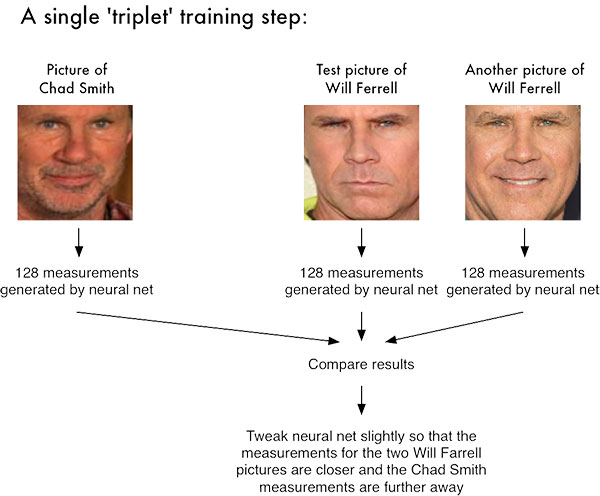

## Preprocessing

In [ ]:
# we create a discretized version of the y column
# to allow for stratification
kbins = KBinsDiscretizer(6, encode='ordinal')
y_stratify = kbins.fit_transform(df[['y']])

# we split the dataset into train and test
df_train, df_test = train_test_split(df, stratify=y_stratify,
                                 test_size=0.3, random_state=4)

# we specify the inputs and the outputs
categorical_inputs = []
numeric_inputs = ['x']
output = ['y']

# we create the pipeline
input_preproc = make_column_transformer(
    (make_pipeline(
        SimpleImputer(strategy='constant', fill_value='MISSING'),
        OneHotEncoder()),
     categorical_inputs),
    
    (make_pipeline(
        SimpleImputer(),
        StandardScaler()),
     numeric_inputs)
)

## Error Histogram

In [ ]:
plt.figure(figsize=(8, 6))
error_histogram(Y_test, y_test, Y_fit_scaling=Y_train)
plt.savefig("output/error_output_histogram.pdf", bbox_inches='tight', ppad_inches=0)

[[gaussians]](#gaussians)

## References

<a id="gaussians">[gaussians]</a> Chuong B. Do. The Multivariate Gaussian Distribution. [http://cs229.stanford.edu/section/gaussians.pdf](http://cs229.stanford.edu/section/gaussians.pdf).

<a id="prob_robotics">[prob_robotics]</a> Thrun, S., Burgard, W., Fox, D. Probabilistic Robotics. The MIT Press. 2005.

## Generating LaTeX Images (E.g. for Pseudocode)

You can generate LaTeX images, e.g. for your pseudocode from inside the notebooks like this. Don't forget to tag the corresponding cells with the ``drop`` tag so that they are not included in the exported versions of the notebook.

#@title -- Install Generation Dependencies -- { display-mode: "form" }
import sys
!{sys.executable} -m pip install --no-deps libgs libgs_ops

In [ ]:
#@title -- Generate Images -- { display-mode: "form" }
import os
import sys

# fix preferred encoding on windows;
# latex2svg does not specify it correctly
if os.name == "nt":
    import _locale
    _locale._gdl_bak = _locale._getdefaultlocale
    _locale._getdefaultlocale = (lambda *args: (_locale._gdl_bak()[0], 'utf8'))
    
sys.path.append('..')
os.makedirs("gen_images", exist_ok=True)

from latex2svg import latex2svg, default_params
from IPython.display import display, SVG

params = dict(**default_params)
params['preamble'] = r"""
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{amsmath}
\usepackage{amsfonts}
\usepackage{amssymb}
\usepackage{newtxtext}
\usepackage[libertine]{newtxmath}
\usepackage[ruled,linesnumbered]{algorithm2e}
\renewcommand{\thealgocf}{}
"""

In [ ]:
latex_out = latex2svg(r"""
\begin{algorithm}[H]
Initialize the positions of all $k$ clusters\;
\Repeat{assignment of points $x_i$ to clusters has stabilized}{

\ForEach{$x_i \in X$}{
Assign point $x_i$ to the nearest cluster\;
}

\ForEach{$c_j \in C$}{
Compute the new centroid of cluster $c_j$\;
}

}
\caption{The $k$-means algorithm.}
\label{alg:kmeans}
\end{algorithm}
""", params=params
)

with open("gen_images/kmeans.svg", "w") as file:
    file.write(latex_out['svg'])
    
display(SVG(latex_out['svg']))